## Import Packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import math
import gym
import numpy as np
import copy
import pandas as pd
import seaborn as sns
import time

import imageio

import IPython
from IPython.display import Image

import sys, subprocess
import time

import itertools


from State import State
from Movement_evaluation import evaluate_by_gravity
import numpy as np
import random
import time
from Ball import Ball
from Config import *
from Game import Game

from CEM_policy_search import *

In [2]:
sns.set_context("talk")

# Logistic Regression + Cross Entropy Search

In [4]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)

nn_policy = LogisticRegression(game)

objective_function = ObjectiveFunction(game=game,
                                       policy=nn_policy,
                                       num_episodes=1,
                                       max_time_steps=120)

In [5]:
hist_dict = {}

init_mean_array = np.random.random(nn_policy.num_params) - 0.5
init_var_array =  np.ones(nn_policy.num_params)

theta = cem_uncorrelated(objective_function=objective_function,
                         mean_array=init_mean_array,
                         var_array=init_var_array,
                         max_iterations=50,
                         sample_size=30,
                         elite_frac=0.33,
                         print_every=1,
                         success_score=-800,
                         num_evals_for_stop=None,
                         hist_dict=hist_dict)

Iteration 0	Score -148.0
var array max:  1.7829494923380473
var array mean:  0.8411321131673859
scores:  [-213. -218. -205. -126. -173. -154. -232. -189. -185. -152. -152. -169.
 -188. -177. -204. -186. -186. -185. -220. -254. -156. -203. -228. -205.
 -145. -237. -217. -194. -210. -246.]
elite indices [19 29 25  6 22 18  1 26  0 28]
Iteration 1	Score -255.0
var array max:  2.115345721873741
var array mean:  0.6746814264257152
scores:  [-215. -281. -125. -206. -200. -196. -111. -162. -199. -238. -221. -266.
 -211. -159. -185. -175. -210. -172. -204. -172. -107. -203. -214. -175.
 -213. -217. -190. -203. -135. -182.]
elite indices [ 1 11  9 10 25  0 22 24 12 16]
Iteration 2	Score -224.0
var array max:  1.927273006376793
var array mean:  0.6246128563812465
scores:  [-225. -181. -194. -133. -215. -188. -227. -183. -170. -228. -246. -184.
 -135. -195. -169. -177. -184. -192. -141. -174. -212. -212. -241. -274.
 -184. -139. -169. -252. -278. -225.]
elite indices [28 23 27 10 22  9  6  0 29  

Iteration 25	Score -263.0
var array max:  1.619382605729609
var array mean:  0.03846693203791722
scores:  [-162. -208. -178. -245. -294. -233. -226. -163. -166. -242. -190. -263.
 -231. -190. -250. -124. -113. -189. -267. -169. -231. -211. -169. -253.
 -350. -186. -237. -163. -172. -222.]
elite indices [24  4 18 11 23 14  3  9 26  5]
Iteration 26	Score -259.0
var array max:  1.4339326266589367
var array mean:  0.03427323622275649
scores:  [-217. -180. -230. -245. -210. -270. -154. -197. -205. -164. -206. -223.
 -253. -232. -180. -176. -160. -196. -219. -176. -142. -151. -236. -128.
 -119. -215. -167. -182. -188. -208.]
elite indices [ 5 12  3 22 13  2 11 18  0 25]
Iteration 27	Score -191.0
var array max:  1.5000982418975142
var array mean:  0.02994824483848701
scores:  [-226. -189. -249. -258. -169. -282. -153. -250. -259. -284. -145. -204.
 -175. -248. -226. -160. -282. -212. -266. -175. -293. -252. -177. -212.
 -231. -159. -246. -159. -118. -258.]
elite indices [20  9  5 16 18  8 29 

In [24]:
np.mean(theta)

-0.015585177538881289

Text(0, 0.5, 'Reward')

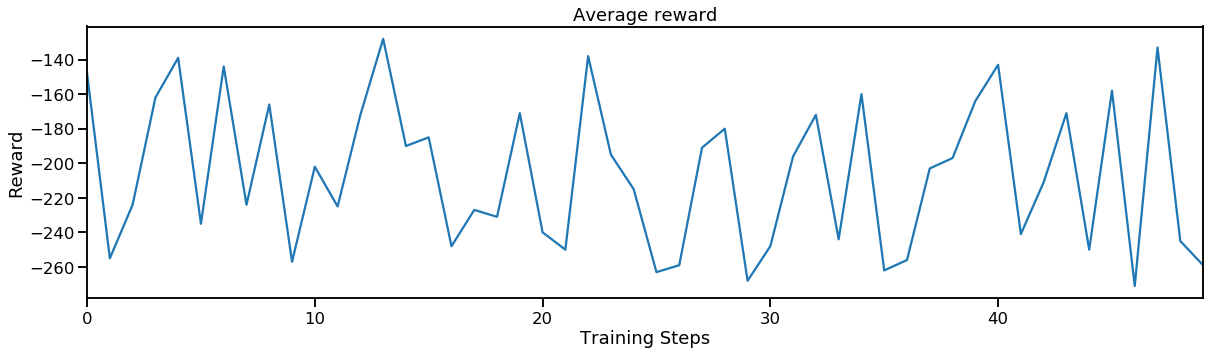

In [9]:
df = pd.DataFrame.from_dict(hist_dict, orient='index')
ax = df[0].plot(title="Average reward", figsize=(20, 5));
plt.xlabel("Training Steps")
plt.ylabel("Reward")

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,-148.0,0.742191,0.012427,-0.183498,0.493027,0.363006,0.118541,-0.165271,-0.269326,-0.130619,...,7.938913e-01,0.490472,1.005552,1.080891e+00,1.080162,0.853804,0.835596,0.963679,9.414324e-01,0.569027
1,-255.0,0.775832,0.443226,0.035328,0.155128,0.504544,0.090448,-0.256213,-0.449039,-0.149405,...,1.136278e+00,0.443022,0.351058,5.507927e-01,0.996577,0.580804,0.658289,0.613094,1.015140e+00,0.467385
2,-224.0,1.223304,0.299718,0.037920,-0.145164,0.375018,0.061060,-0.401123,-0.417803,-0.139080,...,8.237788e-01,0.676572,0.334259,6.427775e-01,1.531799,0.814163,0.575349,0.830417,8.541232e-01,0.320204
3,-162.0,1.177177,0.267932,0.217826,0.050608,0.027302,0.212052,-0.188981,-0.616701,-0.485707,...,1.909491e+00,0.590615,0.445039,4.457676e-01,2.165206,1.015190,0.483358,1.605628,1.777432e+00,0.107566
4,-139.0,0.979668,-0.007678,0.228091,0.007320,-0.222581,0.185903,-0.228616,-0.546873,-0.365420,...,2.053616e-01,0.356404,0.331955,7.303674e-01,0.830691,0.656085,0.434392,0.395170,1.013291e+00,0.059112
5,-235.0,0.927709,0.055330,0.185831,-0.261558,0.108609,0.220088,-0.249895,-0.445940,0.315835,...,2.044320e-01,0.353947,0.187714,5.340044e-01,0.889337,0.209266,0.254381,0.542061,1.900283e+00,0.044780
6,-144.0,0.904558,-0.027437,0.174903,0.014852,-0.033676,0.209692,-0.051037,-0.419568,0.187282,...,7.592240e-02,0.258076,0.157162,4.710623e-01,1.085278,0.128108,0.269558,0.325146,6.917065e-01,0.056161
7,-224.0,1.292960,-0.237965,0.185977,-0.161788,-0.206011,0.354763,-0.094169,-0.496110,0.820611,...,4.984199e-02,0.147829,0.151552,3.546111e-01,0.928664,0.144101,0.337825,0.212039,4.407659e-01,0.030051
8,-166.0,1.293554,-0.197809,0.163869,0.024638,-0.208033,0.367964,-0.044276,-0.525575,0.689549,...,4.918815e-02,0.130337,0.054127,6.227428e-01,1.451300,0.074131,0.329721,0.299969,4.401390e-01,0.053525
9,-257.0,1.388464,-0.119158,0.181724,-0.170085,-0.260550,0.055662,0.001794,-0.585826,0.696858,...,3.794624e-02,0.112645,0.066276,9.911270e-01,1.723796,0.027683,0.337816,0.230792,2.846117e-01,0.030203


Text(0.5, 0, 'Training Steps')

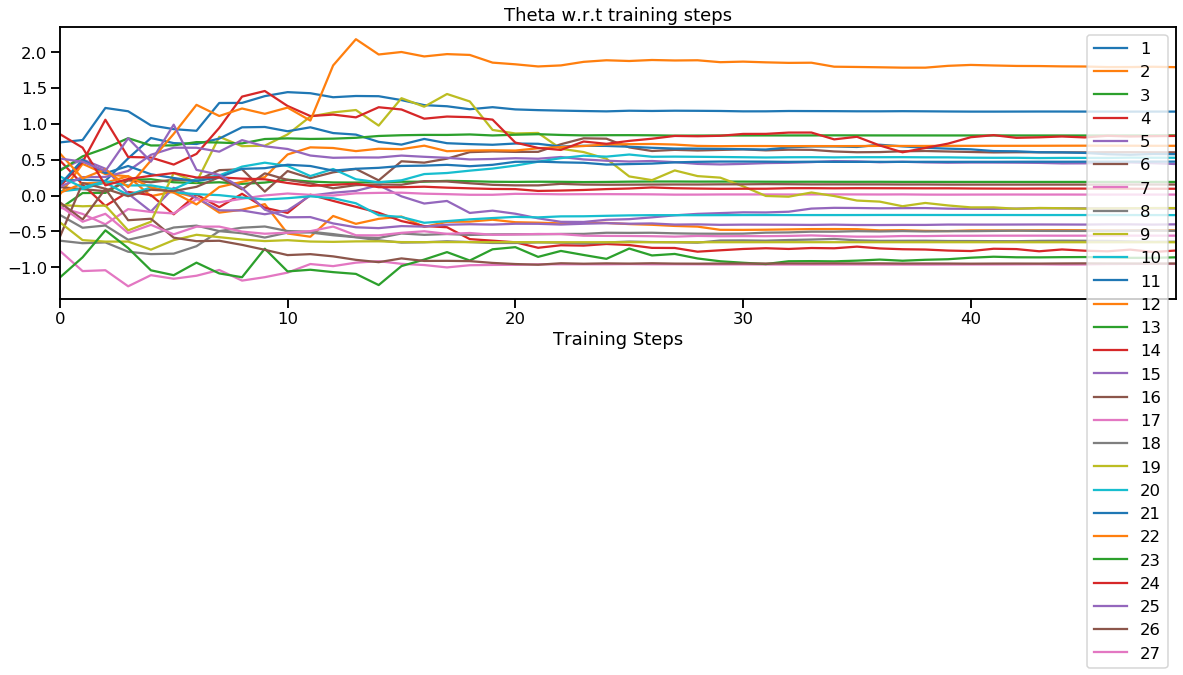

In [26]:
ax = df[list(range(1, 28))].plot(title="Theta w.r.t training steps", figsize=(20, 5));
plt.xlabel("Training Steps")

In [11]:
156 // 2

78

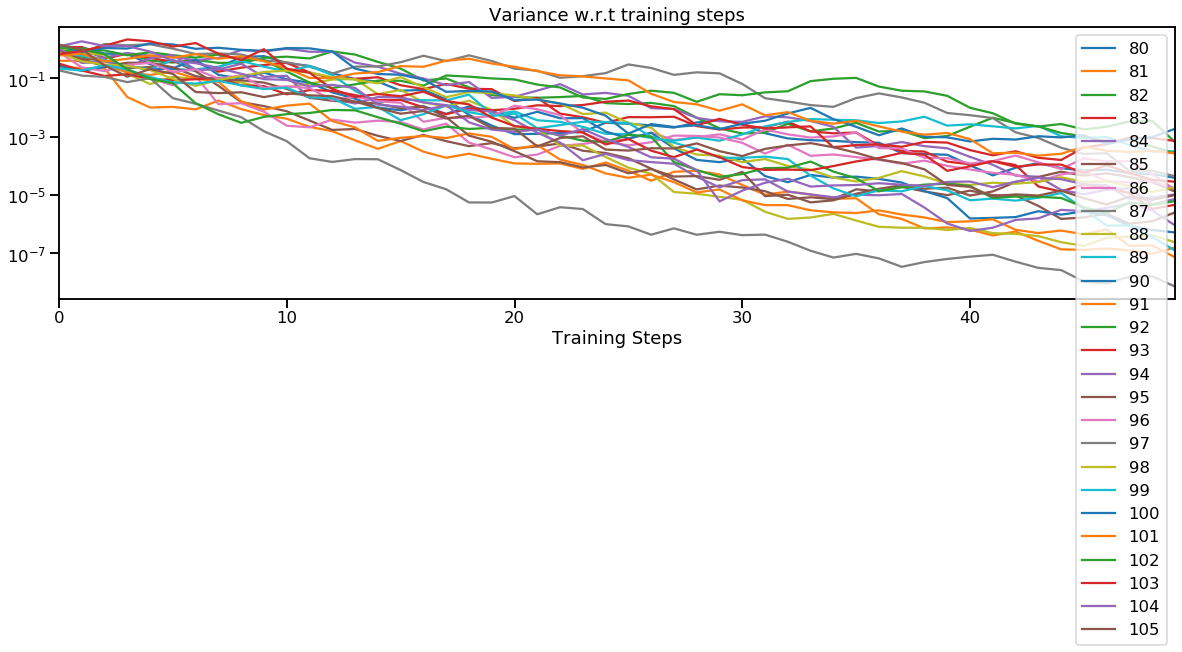

In [25]:
ax = df[list(range(80, 106))].plot(logy=True, title="Variance w.r.t training steps", figsize=(20, 5))
plt.xlabel("Training Steps");

In [22]:
theta = np.load("theta.npy")

In [27]:
lr_agent = LogisticRegressionAgent(theta)
final_rewards = [] # sum of the score at each step
scores = []

start_time = time.time()
for i in range(30):
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    R, _, score = play_one_episode(game, lr_agent, max_step=100)
    print(i, "\t th episode: ", R)
    final_rewards.append(R)
    scores.append(score)
end_time = time.time()

print( (end_time - start_time)/ 60 )

0 	 th episode:  230
1 	 th episode:  329
2 	 th episode:  283
3 	 th episode:  280
4 	 th episode:  229
5 	 th episode:  116
6 	 th episode:  187
7 	 th episode:  286
8 	 th episode:  193
9 	 th episode:  177
10 	 th episode:  188
11 	 th episode:  193
12 	 th episode:  178
13 	 th episode:  174
14 	 th episode:  253
15 	 th episode:  265
16 	 th episode:  254
17 	 th episode:  182
18 	 th episode:  257
19 	 th episode:  171
20 	 th episode:  174
21 	 th episode:  244
22 	 th episode:  272
23 	 th episode:  261
24 	 th episode:  157
25 	 th episode:  220
26 	 th episode:  255
27 	 th episode:  319
28 	 th episode:  186
29 	 th episode:  238
14.474046007792156


(array([1., 1., 5., 6., 1., 3., 7., 4., 0., 2.]),
 array([116. , 137.3, 158.6, 179.9, 201.2, 222.5, 243.8, 265.1, 286.4,
        307.7, 329. ]),
 <a list of 10 Patch objects>)

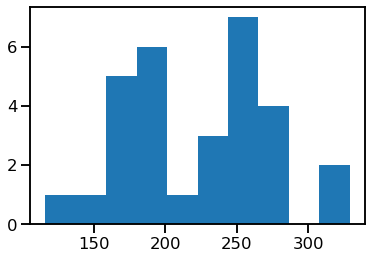

In [28]:
plt.hist(scores)

In [29]:
np.mean(scores)

225.03333333333333

In [30]:
np.std(scores)

50.45756192639074

## Neural Network Policy + CEM

In [2]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
nn_policy = NeuralNetworkPolicy(game)
objective_function = ObjectiveFunction(game=game,
                                       policy=nn_policy,
                                       num_episodes=5,
                                       max_time_steps=100)

Number of parameters per layer: [(79, 16), (17, 16), (17, 1)]
Number of parameters (neural network weights) to optimize: 1553


In [3]:
hist_dict = {}
init_mean_array = np.random.random(nn_policy.num_params) - 0.5
init_var_array = 1 * np.ones(nn_policy.num_params)

theta = cem_uncorrelated(objective_function=objective_function,
                         mean_array=init_mean_array,
                         var_array=init_var_array,
                         max_iterations=50,
                         sample_size=30,
                         elite_frac=0.33,
                         print_every=1,
                         success_score=-800,
                         num_evals_for_stop=None,
                         hist_dict=hist_dict)

Iteration 0	Score -219.4
var array max:  2.8450151474236822
var array mean:  0.905499710309145
scores:  [-203.2 -160.  -178.6 -169.4 -173.2 -184.8 -162.6 -189.4 -160.8 -167.2
 -199.4 -194.  -218.4 -155.4 -199.  -211.  -184.2 -148.6 -152.  -206.6
 -197.2 -179.8 -147.8 -190.  -178.8 -181.  -166.4 -167.  -249.6 -195.2]
elite indices [28 12 15 19  0 10 14 20 29 11]
Iteration 1	Score -185.2
var array max:  5.05310517626667
var array mean:  0.8232652348958458
scores:  [-197.8 -169.  -197.4 -187.4 -175.4 -199.2 -236.  -159.6 -144.6 -173.6
 -204.8 -166.4 -167.2 -165.2 -201.2 -140.8 -163.  -222.2 -193.6 -181.4
 -226.4 -155.8 -159.6 -132.4 -193.  -189.8 -205.2 -161.2 -153.8 -157.6]
elite indices [ 6 20 17 26 10 14  5  0  2 18]
Iteration 2	Score -221.2
var array max:  5.653542274903198
var array mean:  0.7405073249232957
scores:  [-159.8 -184.  -177.  -155.6 -194.2 -198.2 -178.2 -172.6 -207.  -179.
 -182.8 -253.4 -202.  -176.4 -185.2 -153.  -133.  -210.4 -176.6 -168.2
 -175.6 -172.6 -211.2 -164.6

KeyboardInterrupt: 

In [24]:
theta = np.load("theta.npy")

In [25]:
theta.shape

(801,)

Text(0, 0.5, 'Reward')

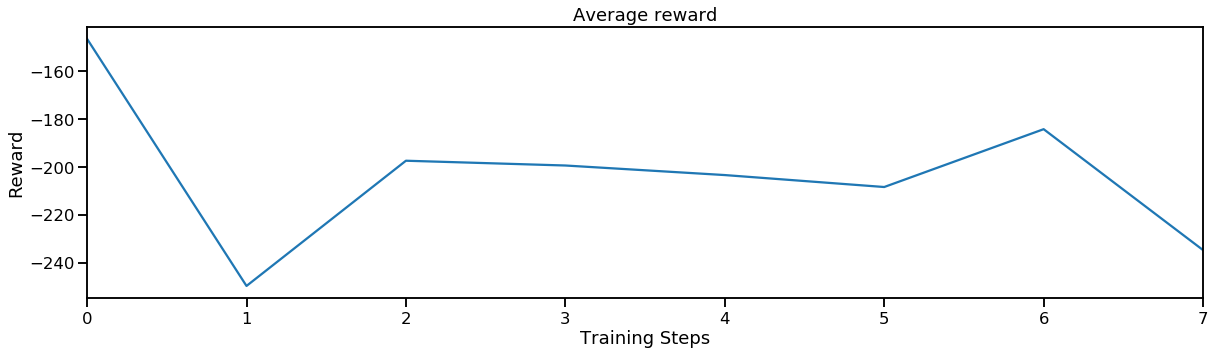

In [26]:
df = pd.DataFrame.from_dict(hist_dict, orient='index')
ax = df[0].plot(title="Average reward", figsize=(20, 5));
plt.xlabel("Training Steps")
plt.ylabel("Reward")

Text(0.5, 0, 'Training Steps')

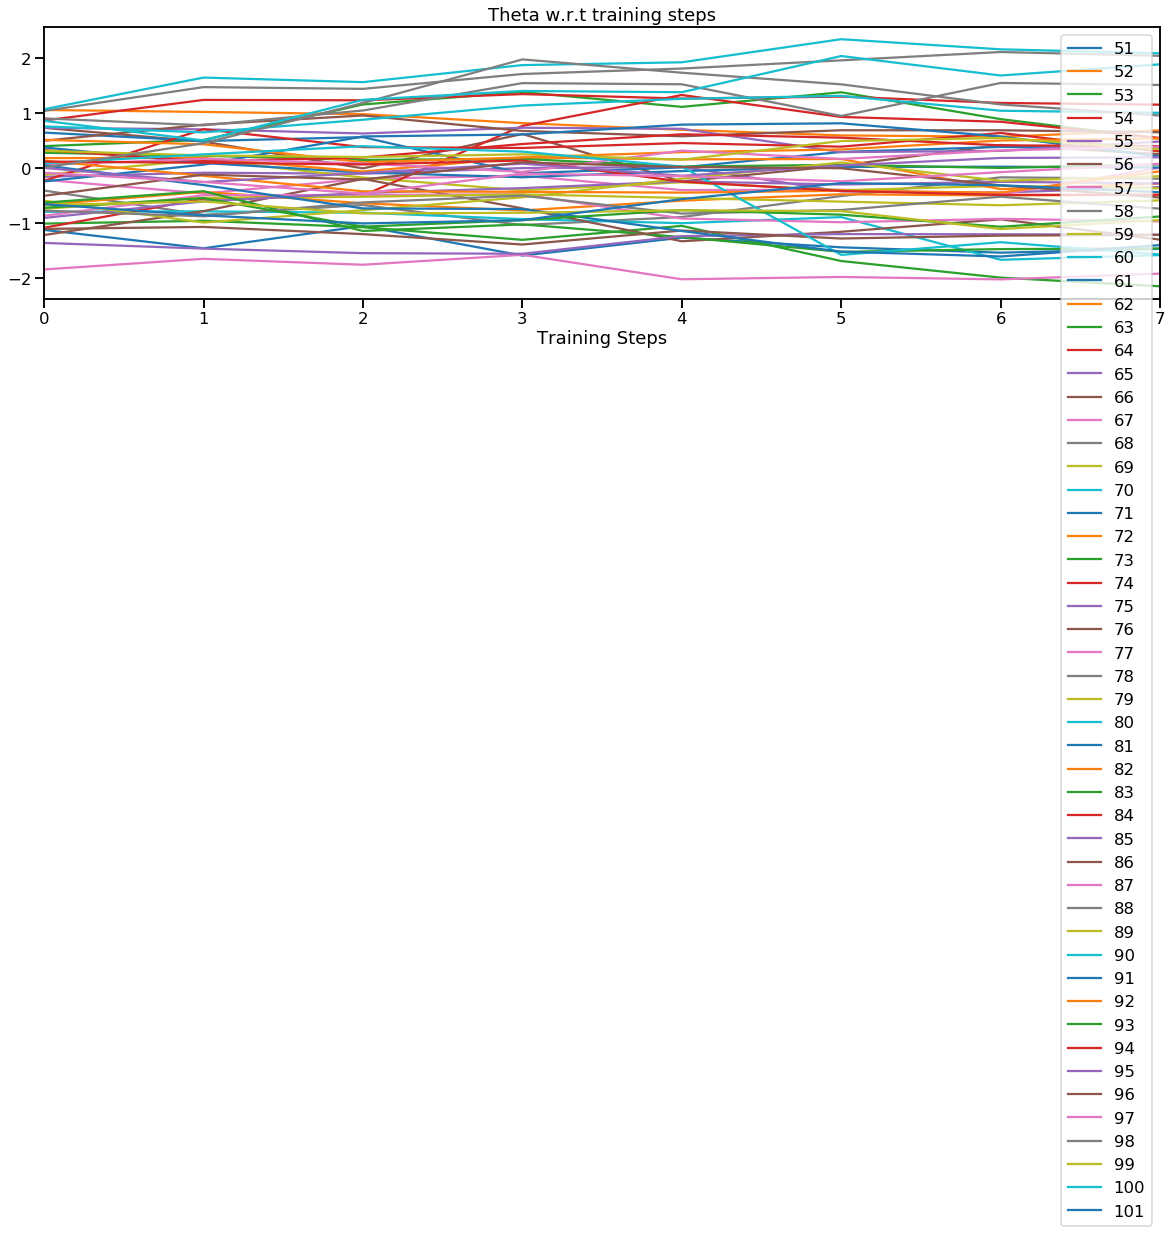

In [27]:
ax = df[list(range(51, 102))].plot(title="Theta w.r.t training steps", figsize=(20, 5));
plt.xlabel("Training Steps")

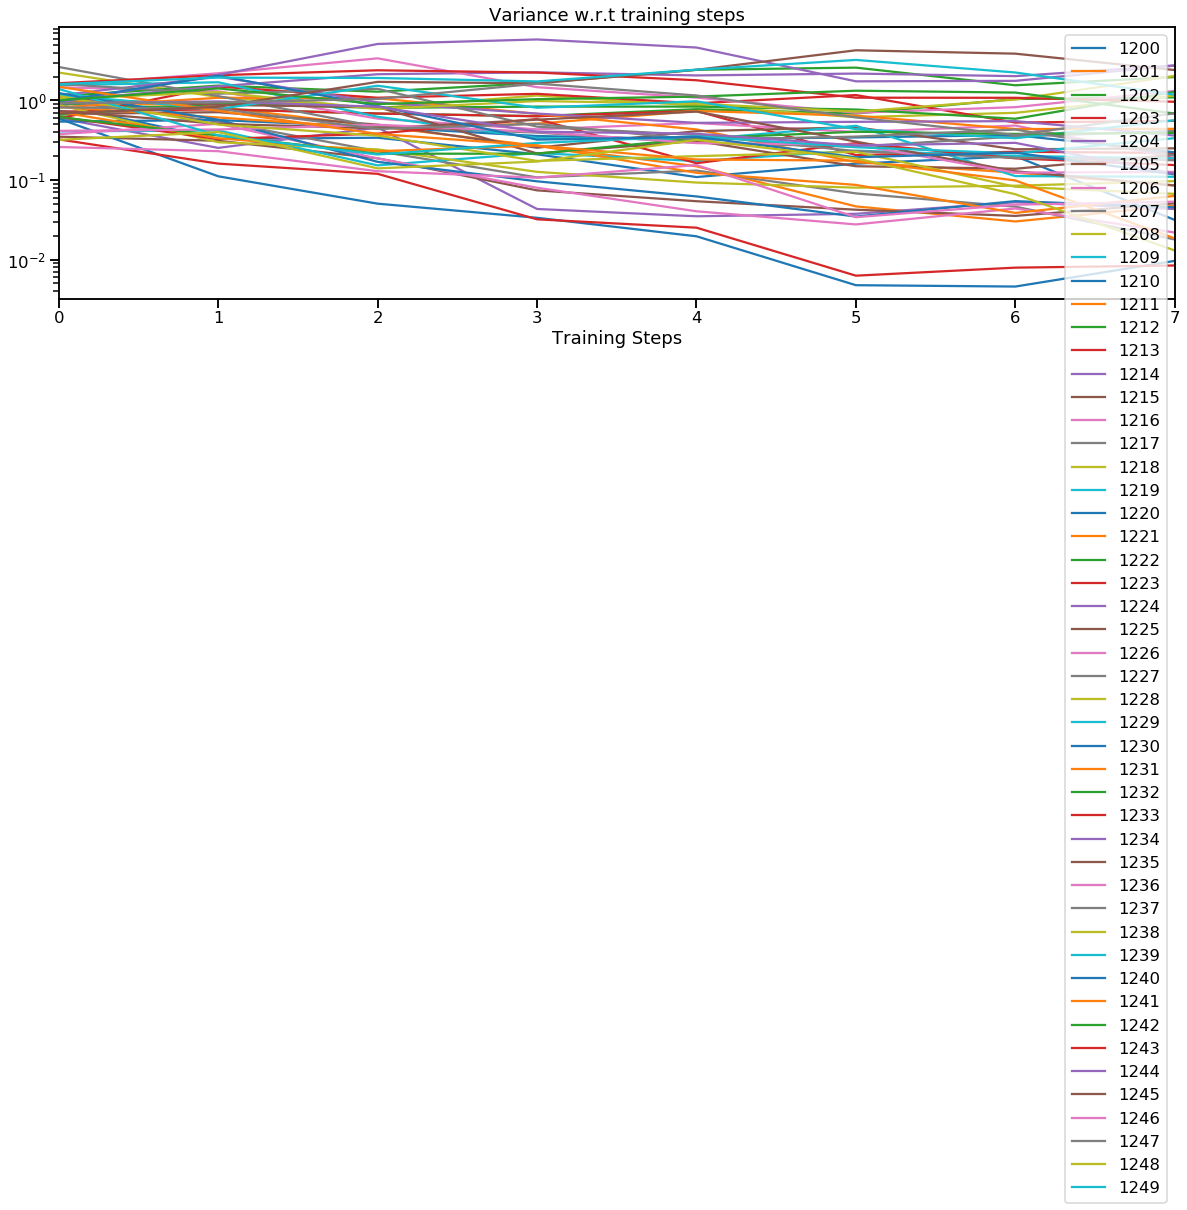

In [28]:
ax = df[list(range(1200, 1250))].plot(logy=True, title="Variance w.r.t training steps", figsize=(20, 5))
plt.xlabel("Training Steps");

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602
0,-146.4,-0.209673,-0.209240,0.791347,0.670921,0.700129,-0.245072,0.138583,-0.596634,-0.251099,...,2.478188,0.963718,1.128075,0.404060,0.701369,0.799267,1.037378,0.839719,0.751400,0.555995
1,-249.8,0.024070,0.546109,1.007612,0.571748,0.242436,-0.272264,0.558567,-0.560253,-0.427259,...,1.248702,0.165490,1.003315,0.275182,0.751309,0.748023,1.632207,0.894419,0.874864,0.609610
2,-197.4,0.087515,0.218295,0.487170,0.928273,0.016199,-0.132028,0.842436,-1.003823,-0.385269,...,0.966761,0.062798,0.583614,0.457673,0.653904,0.751951,1.158847,0.991730,1.341957,1.094673
3,-199.4,0.154420,0.407855,0.175386,0.526447,0.060541,0.051787,1.023114,-1.094097,-0.065166,...,2.005461,0.051158,0.397215,0.318069,0.318881,0.411433,1.228105,1.825278,2.844987,1.049660
4,-203.4,-0.006663,0.564637,0.344571,0.496942,0.174723,0.288672,1.419022,-0.487179,-0.128057,...,0.757984,0.050995,0.439981,0.380769,0.337643,0.456400,2.370209,4.192999,2.260611,0.560964
5,-208.4,-0.083468,0.569655,0.384935,0.945637,0.574163,0.252037,1.296933,-0.108568,-0.034689,...,0.563783,0.022806,0.275158,0.580484,0.236584,0.161868,3.843963,5.124674,0.865236,0.423282
6,-184.2,-0.120431,0.791945,0.657772,1.201331,0.553405,0.269967,1.202226,0.054177,0.013554,...,0.447582,0.019384,0.118261,0.275094,0.481209,0.115369,5.964417,3.505388,0.448832,0.407073
7,-234.8,-0.157628,0.710267,0.648677,1.491522,0.158799,0.264067,1.021965,-0.046653,-0.021520,...,0.894429,0.010015,0.070544,0.415871,0.232490,0.114577,8.122146,3.949543,0.519424,0.420082


In [13]:
lr_agent = NeuralNetworkPolicy(game, theta)
final_rewards = [] # sum of the score at each step
scores = []

start_time = time.time()
for i in range(50):
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    R, _, score = play_one_episode(game, lr_agent, max_step=100)
    print(i, "\t th episode: ", R)
    final_rewards.append(R)
    scores.append(score)
end_time = time.time()

print( (end_time - start_time)/ 60 )

Number of parameters per layer: [(32, 16), (17, 16), (17, 1)]
Number of parameters (neural network weights) to optimize: 801
0 	 th episode:  109
1 	 th episode:  163
2 	 th episode:  200
3 	 th episode:  243
4 	 th episode:  201
5 	 th episode:  307
6 	 th episode:  253
7 	 th episode:  169
8 	 th episode:  201
9 	 th episode:  101
10 	 th episode:  131
11 	 th episode:  230
12 	 th episode:  219
13 	 th episode:  247
14 	 th episode:  227
15 	 th episode:  260
16 	 th episode:  251
17 	 th episode:  180
18 	 th episode:  156
19 	 th episode:  186
20 	 th episode:  118
21 	 th episode:  286
22 	 th episode:  242
23 	 th episode:  112
24 	 th episode:  133
25 	 th episode:  280
26 	 th episode:  195
27 	 th episode:  193
28 	 th episode:  254
29 	 th episode:  287
30 	 th episode:  207
31 	 th episode:  191
32 	 th episode:  98
33 	 th episode:  182
34 	 th episode:  313
35 	 th episode:  196
36 	 th episode:  225
37 	 th episode:  174
38 	 th episode:  310
39 	 th episode:  255
40 	 t

Text(0.5, 0, 'Points')

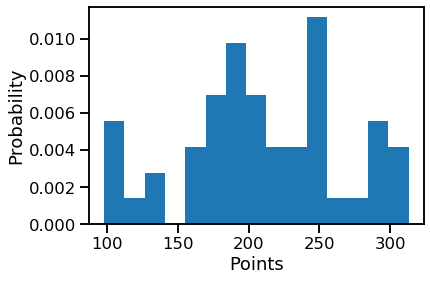

In [14]:
plt.hist(final_rewards, density=True, bins=15)
plt.ylabel('Probability')
plt.xlabel('Points')